In [2]:
def density_calc(V1,V2,V3):
    return (m_EDTA * (V1 + V2 + V3) * M_Ca2)/(3 * M_EDTA * (V_H2O + V_NaOH) * V_milk_sample)

m_EDTA = 3.64 # g
M_EDTA = 336.208 # g/mol
V_H2O = 0.5000 # L
V_NaOH = 0.1000 # L
V_milk_sample = 0.00500 # L
M_Ca2 = 40.078 #g/mol

soy1 = 0.00869 - 0.00469 # L
soy2 = 0.01339 - 0.00945 # L
soy3 = 0.01749 - 0.01352 # L

goat1 = 0.03979 - 0.03361 # L
goat2 = 0.04620 - 0.04000 # L
goat3 = 0.05322 - 0.04710 # L

regular1 = 0.02279 - 0.01671# L
regular2 = 0.02882 - 0.02279# L
regular3 = 0.03646 - 0.03042# L

almond1 = 0.03387 - 0.03089 # L
almond2 = 0.03694 - 0.03387 # L
almond3 = 0.04022 - 0.03714 # L

orgo1 = 0.02101 - 0.01489 # L
orgo2 = 0.02698 - 0.02101 # L
orgo3 = 0.03342 - 0.02734 # L

den_soy = density_calc(soy1, soy2, soy3)
den_goat = density_calc(goat1, goat2, goat3)
den_milk = density_calc(regular1, regular2, regular3)
den_almond = density_calc(almond1, almond2, almond3)
den_orgo = density_calc(orgo1, orgo2, orgo3)
print("Soy Milk: " + str(den_soy))
print("Goat Milk: " + str(den_goat))
print("Regular Milk: " + str(den_milk))
print("Almond Milk: " + str(den_almond))
print("Organic Milk: " + str(den_orgo))

Soy Milk: 0.5742071995114135
Goat Milk: 0.8919255408027833
Regular Milk: 0.8750512738146228
Almond Milk: 0.4401773074340223
Organic Milk: 0.8760155176425176


In [3]:
dm_EDTA = 0.01 # g
dV1 = 0.0001 # L
dV2 = 0.0001 # L
dV3 = 0.0001 # L
dV_H2O = 0.0006 # L
dV_NaOH = 0.0002 # L
dV_milk_sample = 0.00001# L

def unc_calc(V1, V2, V3):
    return ((dm_EDTA/m_EDTA)+((dV1 + dV2 + dV3)/(V1 + V2 + V3)) + ((dV_H2O + dV_NaOH)/(V_H2O + V_NaOH)) + (dV_milk_sample/V_milk_sample))
unc_soy = unc_calc(soy1, soy2, soy3)
unc_goat = unc_calc(goat1, goat2, goat3)
unc_milk = unc_calc(regular1, regular2, regular3)
unc_almond = unc_calc(almond1, almond2, almond3)
unc_orgo = unc_calc(orgo1, orgo2, orgo3)
print("Soy Milk: " + str(unc_soy))
print("Goat Milk: " + str(unc_goat))
print("Regular Milk: " + str(unc_milk))
print("Almond Milk: " + str(unc_almond))
print("Organic Milk: " + str(unc_orgo))

Soy Milk: 0.03126950295716039
Goat Milk: 0.022296802296802302
Regular Milk: 0.02260951170042079
Almond Milk: 0.038939293638088825
Organic Milk: 0.022591318056370345


In [6]:
import pandas as pd
df = pd.DataFrame({'Types of Milks':['Soy', 'Goat', '2% Partially Skimmed', 'Almond','2% Organic'],
                   'Density (g/L)':[den_soy, den_goat,den_milk,den_almond,den_orgo], 'Error':[unc_soy*den_soy,unc_goat*den_goat,unc_milk*den_milk,unc_almond*den_almond,unc_orgo*den_orgo]})
print(df)

         Types of Milks  Density (g/L)     Error
0                   Soy       0.574207  0.017955
1                  Goat       0.891926  0.019887
2  2% Partially Skimmed       0.875051  0.019784
3                Almond       0.440177  0.017140
4            2% Organic       0.876016  0.019790


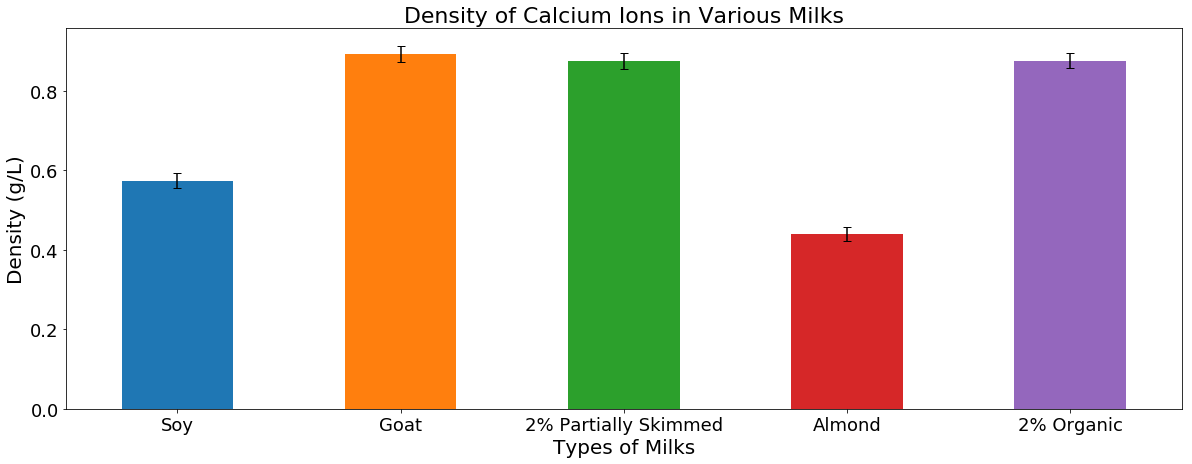

In [8]:
graph = df.plot.bar(x = 'Types of Milks', y = 'Density (g/L)',yerr = 'Error', rot = 0,
                    legend = False, capsize = 4, figsize = (20,7))
graph.set_xlabel('Types of Milks', size = 20)
graph.set_ylabel('Density (g/L)', size = 20)
graph.set_title('Density of Calcium Ions in Various Milks', size = 22)
graph.tick_params(labelsize = 18)

In [9]:
print(unc_soy*den_soy)

0.01795517372314493
